# Stanford Sentiment Treebank (SST)

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!pip3 install transformers
!pip install sentencepiece

In [3]:
#import sys
#sys.path.append('/drive/My Drive/SST-2-sentiment-analysis/')
%cd drive/My Drive/SST-2-sentiment-analysis/
!pwd 

/content/drive/My Drive/SST-2-sentiment-analysis
/content/drive/My Drive/SST-2-sentiment-analysis


## BERT Model- bert-base-uncased 

In [9]:
from run_Bert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Bert/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

====================  Preparing for training  ====================
No.of epochs 5
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.7071, accuracy: 48.5092%, auc: 0.5065

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.1657s, loss: 0.2461: 100%|██████████| 2105/2105 [06:07<00:00,  5.73it/s]


-> Training time: 367.3752s, loss = 0.2461, accuracy: 89.9704%
* Validation for epoch 1:
-> Valid. time: 1.3985s, loss: 0.2459, accuracy: 91.0550%, auc: 0.9693

* Test for epoch 1:
Test accuracy: 0.9242%

* Training epoch 2:


Avg. batch proc. time: 0.1657s, loss: 0.1247: 100%|██████████| 2105/2105 [06:07<00:00,  5.73it/s]


-> Training time: 367.2500s, loss = 0.1247, accuracy: 95.6163%
* Validation for epoch 2:
-> Valid. time: 1.3983s, loss: 0.2483, accuracy: 91.8578%, auc: 0.9671

* Test for epoch 2:
Test accuracy: 0.9237%

* Training epoch 3:


Avg. batch proc. time: 0.1657s, loss: 0.0869: 100%|██████████| 2105/2105 [06:07<00:00,  5.73it/s]


-> Training time: 367.1855s, loss = 0.0869, accuracy: 96.9989%
* Validation for epoch 3:
-> Valid. time: 1.3966s, loss: 0.3052, accuracy: 90.7110%, auc: 0.9692

* Test for epoch 3:
Test accuracy: 0.9176%

* Training epoch 4:


Avg. batch proc. time: 0.1657s, loss: 0.0598: 100%|██████████| 2105/2105 [06:07<00:00,  5.73it/s]


-> Training time: 367.1192s, loss = 0.0598, accuracy: 98.0176%
* Validation for epoch 4:
-> Valid. time: 1.3981s, loss: 0.2714, accuracy: 90.8257%, auc: 0.9675

* Test for epoch 4:
Test accuracy: 0.9220%

* Training epoch 5:


Avg. batch proc. time: 0.1657s, loss: 0.0423: 100%|██████████| 2105/2105 [06:07<00:00,  5.73it/s]


-> Training time: 367.1465s, loss = 0.0423, accuracy: 98.5165%
* Validation for epoch 5:
-> Valid. time: 1.3972s, loss: 0.3283, accuracy: 91.0550%, auc: 0.9661

* Test for epoch 5:
Test accuracy: 0.9303%

save model succesfully!

Accuracy: 93.0%
Precision: 93.1%
Recall: 93.0%
F1: 93.0%
classification_report:

              precision    recall  f1-score   support

    Negative      0.946     0.913     0.929       912
    Positive      0.916     0.947     0.931       909

    accuracy                          0.930      1821
   macro avg      0.931     0.930     0.930      1821
weighted avg      0.931     0.930     0.930      1821



## Roberta

In [4]:
from run_Roberta_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Roberta/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction)

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

====================  Preparing for training  ====================
No.of epochs 5
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.6932, accuracy: 49.1972%, auc: 0.4835

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.1704s, loss: 0.2501: 100%|██████████| 2105/2105 [06:21<00:00,  5.52it/s]


-> Training time: 381.6466s, loss = 0.2501, accuracy: 89.9927%
* Validation for epoch 1:
-> Valid. time: 1.4187s, loss: 0.2141, accuracy: 92.8899%, auc: 0.9790

* Test for epoch 1:
Test accuracy: 0.9429%

* Training epoch 2:


Avg. batch proc. time: 0.1703s, loss: 0.1493: 100%|██████████| 2105/2105 [06:21<00:00,  5.52it/s]


-> Training time: 381.4559s, loss = 0.1493, accuracy: 94.5576%
* Validation for epoch 2:
-> Valid. time: 1.4191s, loss: 0.2124, accuracy: 92.6606%, auc: 0.9787

* Test for epoch 2:
Test accuracy: 0.9473%

* Training epoch 3:


Avg. batch proc. time: 0.1706s, loss: 0.1077: 100%|██████████| 2105/2105 [06:21<00:00,  5.51it/s]


-> Training time: 381.7031s, loss = 0.1077, accuracy: 96.2014%
* Validation for epoch 3:
-> Valid. time: 1.4148s, loss: 0.1986, accuracy: 93.0046%, auc: 0.9818

* Test for epoch 3:
Test accuracy: 0.9500%

* Training epoch 4:


Avg. batch proc. time: 0.1710s, loss: 0.0863: 100%|██████████| 2105/2105 [06:22<00:00,  5.50it/s]


-> Training time: 382.6384s, loss = 0.0863, accuracy: 97.0286%
* Validation for epoch 4:
-> Valid. time: 1.4170s, loss: 0.2657, accuracy: 93.2339%, auc: 0.9779

* Test for epoch 4:
Test accuracy: 0.9489%

* Training epoch 5:


Avg. batch proc. time: 0.1710s, loss: 0.0706: 100%|██████████| 2105/2105 [06:22<00:00,  5.50it/s]


-> Training time: 382.8907s, loss = 0.0706, accuracy: 97.6166%
* Validation for epoch 5:
-> Valid. time: 1.4301s, loss: 0.3037, accuracy: 92.8899%, auc: 0.9743

* Test for epoch 5:
Test accuracy: 0.9522%

save model succesfully!

Accuracy: 95.2%
Precision: 95.3%
Recall: 95.2%
F1: 95.2%
classification_report:

              precision    recall  f1-score   support

    Negative      0.971     0.932     0.951       912
    Positive      0.934     0.972     0.953       909

    accuracy                          0.952      1821
   macro avg      0.953     0.952     0.952      1821
weighted avg      0.953     0.952     0.952      1821



## XLNET

In [5]:
from run_Xlnet_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Xlnet/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

====================  Preparing for training  ====================
No.of epochs 5
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.7164, accuracy: 47.4771%, auc: 0.4613

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2028s, loss: 0.2397: 100%|██████████| 2105/2105 [07:34<00:00,  4.63it/s]


-> Training time: 454.7254s, loss = 0.2397, accuracy: 90.4189%
* Validation for epoch 1:
-> Valid. time: 1.8081s, loss: 0.2283, accuracy: 93.1193%, auc: 0.9758

* Test for epoch 1:
Test accuracy: 0.9237%

* Training epoch 2:


Avg. batch proc. time: 0.2027s, loss: 0.1386: 100%|██████████| 2105/2105 [07:34<00:00,  4.63it/s]


-> Training time: 454.6565s, loss = 0.1386, accuracy: 95.0461%
* Validation for epoch 2:
-> Valid. time: 1.8000s, loss: 0.2149, accuracy: 92.7752%, auc: 0.9787

* Test for epoch 2:
Test accuracy: 0.9165%

* Training epoch 3:


Avg. batch proc. time: 0.2027s, loss: 0.1024: 100%|██████████| 2105/2105 [07:34<00:00,  4.63it/s]


-> Training time: 454.4532s, loss = 0.1024, accuracy: 96.3915%
* Validation for epoch 3:
-> Valid. time: 1.7921s, loss: 0.2524, accuracy: 92.0872%, auc: 0.9746

* Test for epoch 3:
Test accuracy: 0.9368%

* Training epoch 4:


Avg. batch proc. time: 0.2027s, loss: 0.0761: 100%|██████████| 2105/2105 [07:34<00:00,  4.63it/s]


-> Training time: 454.2540s, loss = 0.0761, accuracy: 97.3166%
* Validation for epoch 4:
-> Valid. time: 1.7903s, loss: 0.2460, accuracy: 91.8578%, auc: 0.9766

* Test for epoch 4:
Test accuracy: 0.9275%

* Training epoch 5:


Avg. batch proc. time: 0.2027s, loss: 0.0608: 100%|██████████| 2105/2105 [07:34<00:00,  4.63it/s]


-> Training time: 454.2474s, loss = 0.0608, accuracy: 97.8884%
* Validation for epoch 5:
-> Valid. time: 1.7901s, loss: 0.2994, accuracy: 92.7752%, auc: 0.9760

* Test for epoch 5:
Test accuracy: 0.9347%

save model succesfully!

Accuracy: 93.5%
Precision: 93.5%
Recall: 93.5%
F1: 93.5%
classification_report:

              precision    recall  f1-score   support

    Negative      0.952     0.916     0.933       912
    Positive      0.918     0.954     0.936       909

    accuracy                          0.935      1821
   macro avg      0.935     0.935     0.935      1821
weighted avg      0.935     0.935     0.935      1821



## DistilBert Model

In [6]:
from run_distilBert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/distilBert/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

====================  Preparing for training  ====================
No.of epochs 5
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.6921, accuracy: 51.8349%, auc: 0.5139

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.0735s, loss: 0.2392: 100%|██████████| 2105/2105 [03:18<00:00, 10.61it/s]


-> Training time: 198.4609s, loss = 0.2392, accuracy: 90.4100%
* Validation for epoch 1:
-> Valid. time: 0.7271s, loss: 0.2915, accuracy: 89.7936%, auc: 0.9624

* Test for epoch 1:
Test accuracy: 0.9099%

* Training epoch 2:


Avg. batch proc. time: 0.0735s, loss: 0.1242: 100%|██████████| 2105/2105 [03:18<00:00, 10.60it/s]


-> Training time: 198.5083s, loss = 0.1242, accuracy: 95.5198%
* Validation for epoch 2:
-> Valid. time: 0.7268s, loss: 0.3139, accuracy: 88.9908%, auc: 0.9592

* Test for epoch 2:
Test accuracy: 0.9088%

* Training epoch 3:


Avg. batch proc. time: 0.0735s, loss: 0.0789: 100%|██████████| 2105/2105 [03:18<00:00, 10.63it/s]


-> Training time: 198.1206s, loss = 0.0789, accuracy: 97.2335%
* Validation for epoch 3:
-> Valid. time: 0.7240s, loss: 0.3447, accuracy: 88.3028%, auc: 0.9605

* Test for epoch 3:
Test accuracy: 0.9083%

* Training epoch 4:


Avg. batch proc. time: 0.0734s, loss: 0.0540: 100%|██████████| 2105/2105 [03:17<00:00, 10.65it/s]


-> Training time: 197.6165s, loss = 0.0540, accuracy: 98.0517%
* Validation for epoch 4:
-> Valid. time: 0.7249s, loss: 0.3559, accuracy: 90.2523%, auc: 0.9611

* Test for epoch 4:
Test accuracy: 0.9253%

* Training epoch 5:


Avg. batch proc. time: 0.0734s, loss: 0.0406: 100%|██████████| 2105/2105 [03:17<00:00, 10.63it/s]


-> Training time: 197.9591s, loss = 0.0406, accuracy: 98.4675%
* Validation for epoch 5:
-> Valid. time: 0.7324s, loss: 0.4369, accuracy: 89.4495%, auc: 0.9593

* Test for epoch 5:
Test accuracy: 0.9116%

save model succesfully!

Accuracy: 91.2%
Precision: 91.5%
Recall: 91.2%
F1: 91.1%
classification_report:

              precision    recall  f1-score   support

    Negative      0.953     0.866     0.908       912
    Positive      0.877     0.957     0.915       909

    accuracy                          0.912      1821
   macro avg      0.915     0.912     0.911      1821
weighted avg      0.915     0.912     0.911      1821



## ALBERT

In [8]:
from run_Albert_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Albert/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.decoder.bias', 'predictions.decoder.weight']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

Downloading:   0%|          | 0.00/742k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

====================  Preparing for training  ====================
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.7625, accuracy: 50.8028%, auc: 0.4763

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.0720s, loss: 0.3109: 100%|██████████| 2105/2105 [06:01<00:00,  5.82it/s]


-> Training time: 361.8541s, loss = 0.3109, accuracy: 86.6426%
* Validation for epoch 1:
-> Valid. time: 1.6000s, loss: 0.3161, accuracy: 87.6147%, auc: 0.9433

* Test for epoch 1:
Test accuracy: 0.8720%

* Training epoch 2:


Avg. batch proc. time: 0.0721s, loss: 0.1613: 100%|██████████| 2105/2105 [06:02<00:00,  5.81it/s]


-> Training time: 362.2166s, loss = 0.1613, accuracy: 94.1952%
* Validation for epoch 2:
-> Valid. time: 1.6100s, loss: 0.3298, accuracy: 87.9587%, auc: 0.9500

* Test for epoch 2:
Test accuracy: 0.8858%

* Training epoch 3:


Avg. batch proc. time: 0.0722s, loss: 0.1125: 100%|██████████| 2105/2105 [06:02<00:00,  5.80it/s]


-> Training time: 362.6334s, loss = 0.1125, accuracy: 96.2222%
* Validation for epoch 3:
-> Valid. time: 1.6117s, loss: 0.3799, accuracy: 88.1881%, auc: 0.9451

* Test for epoch 3:
Test accuracy: 0.8891%

* Training epoch 4:


Avg. batch proc. time: 0.0722s, loss: 0.0830: 100%|██████████| 2105/2105 [06:02<00:00,  5.81it/s]


-> Training time: 362.4738s, loss = 0.0830, accuracy: 97.2320%
* Validation for epoch 4:
-> Valid. time: 1.6116s, loss: 0.3157, accuracy: 87.8440%, auc: 0.9477

* Test for epoch 4:
Test accuracy: 0.8880%

* Training epoch 5:


Avg. batch proc. time: 0.0721s, loss: 0.0565: 100%|██████████| 2105/2105 [06:02<00:00,  5.81it/s]


-> Training time: 362.3703s, loss = 0.0565, accuracy: 98.1675%
* Validation for epoch 5:
-> Valid. time: 1.6108s, loss: 0.3792, accuracy: 88.3028%, auc: 0.9464

* Test for epoch 5:
Test accuracy: 0.8858%

save model succesfully!

Accuracy: 88.6%
Precision: 88.8%
Recall: 88.6%
F1: 88.6%
classification_report:

              precision    recall  f1-score   support

    Negative      0.915     0.851     0.882       912
    Positive      0.860     0.921     0.889       909

    accuracy                          0.886      1821
   macro avg      0.888     0.886     0.886      1821
weighted avg      0.888     0.886     0.886      1821



## GPT2

In [9]:
from run_GPT2_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/GPT2/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Downloading:   0%|          | 0.00/812 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at microsoft/DialogRPT-updown and are newly initialized because the shapes did not match:
- score.weight: found shape torch.Size([1, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

====================  Preparing for training  ====================
No.of epochs 5
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.7396, accuracy: 49.0826%, auc: 0.5050

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.5873s, loss: 0.2791: 100%|██████████| 2105/2105 [20:53<00:00,  1.68it/s]


-> Training time: 1253.4095s, loss = 0.2791, accuracy: 87.6049%
* Validation for epoch 1:
-> Valid. time: 4.9202s, loss: 0.2483, accuracy: 91.1697%, auc: 0.9690

* Test for epoch 1:
Test accuracy: 0.9248%

* Training epoch 2:


Avg. batch proc. time: 0.5873s, loss: 0.1387: 100%|██████████| 2105/2105 [20:53<00:00,  1.68it/s]


-> Training time: 1253.2740s, loss = 0.1387, accuracy: 94.9080%
* Validation for epoch 2:
-> Valid. time: 4.9163s, loss: 0.2221, accuracy: 91.8578%, auc: 0.9751

* Test for epoch 2:
Test accuracy: 0.9379%

* Training epoch 3:


Avg. batch proc. time: 0.5872s, loss: 0.0956: 100%|██████████| 2105/2105 [20:53<00:00,  1.68it/s]


-> Training time: 1253.2051s, loss = 0.0956, accuracy: 96.6113%
* Validation for epoch 3:
-> Valid. time: 4.9168s, loss: 0.2150, accuracy: 91.1697%, auc: 0.9777

* Test for epoch 3:
Test accuracy: 0.9308%

* Training epoch 4:


Avg. batch proc. time: 0.5871s, loss: 0.0660: 100%|██████████| 2105/2105 [20:52<00:00,  1.68it/s]


-> Training time: 1252.9167s, loss = 0.0660, accuracy: 97.6612%
* Validation for epoch 4:
-> Valid. time: 4.9097s, loss: 0.2597, accuracy: 91.8578%, auc: 0.9752

* Test for epoch 4:
Test accuracy: 0.9385%

* Training epoch 5:


Avg. batch proc. time: 0.5868s, loss: 0.0477: 100%|██████████| 2105/2105 [20:51<00:00,  1.68it/s]


-> Training time: 1251.9534s, loss = 0.0477, accuracy: 98.2344%
* Validation for epoch 5:
-> Valid. time: 4.9158s, loss: 0.2594, accuracy: 92.4312%, auc: 0.9756

* Test for epoch 5:
Test accuracy: 0.9385%

save model succesfully!

Accuracy: 93.8%
Precision: 93.9%
Recall: 93.9%
F1: 93.8%
classification_report:

              precision    recall  f1-score   support

    Negative      0.958     0.918     0.937       912
    Positive      0.921     0.959     0.940       909

    accuracy                          0.938      1821
   macro avg      0.939     0.939     0.938      1821
weighted avg      0.939     0.938     0.938      1821



## Electra

In [10]:
from run_Electra_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Electra/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.7M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/electra-small-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

====================  Preparing for training  ====================
No.of epochs 5
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.6917, accuracy: 50.9174%, auc: 0.5550

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.0658s, loss: 0.3252: 100%|██████████| 2105/2105 [02:27<00:00, 14.24it/s]


-> Training time: 147.8733s, loss = 0.3252, accuracy: 85.9016%
* Validation for epoch 1:
-> Valid. time: 0.3710s, loss: 0.2819, accuracy: 89.9083%, auc: 0.9589

* Test for epoch 1:
Test accuracy: 0.9077%

* Training epoch 2:


Avg. batch proc. time: 0.0649s, loss: 0.1960: 100%|██████████| 2105/2105 [02:25<00:00, 14.42it/s]


-> Training time: 145.9957s, loss = 0.1960, accuracy: 92.4132%
* Validation for epoch 2:
-> Valid. time: 0.3729s, loss: 0.2952, accuracy: 89.4495%, auc: 0.9630

* Test for epoch 2:
Test accuracy: 0.9028%

* Training epoch 3:


Avg. batch proc. time: 0.0654s, loss: 0.1467: 100%|██████████| 2105/2105 [02:27<00:00, 14.30it/s]


-> Training time: 147.2461s, loss = 0.1467, accuracy: 94.5828%
* Validation for epoch 3:
-> Valid. time: 0.3613s, loss: 0.2688, accuracy: 90.4817%, auc: 0.9646

* Test for epoch 3:
Test accuracy: 0.9132%

* Training epoch 4:


Avg. batch proc. time: 0.0651s, loss: 0.1216: 100%|██████████| 2105/2105 [02:26<00:00, 14.39it/s]


-> Training time: 146.3311s, loss = 0.1216, accuracy: 95.5896%
* Validation for epoch 4:
-> Valid. time: 0.3881s, loss: 0.3201, accuracy: 88.8761%, auc: 0.9632

* Test for epoch 4:
Test accuracy: 0.9160%

* Training epoch 5:


Avg. batch proc. time: 0.0655s, loss: 0.1017: 100%|██████████| 2105/2105 [02:27<00:00, 14.30it/s]


-> Training time: 147.2223s, loss = 0.1017, accuracy: 96.3440%
* Validation for epoch 5:
-> Valid. time: 0.3649s, loss: 0.3251, accuracy: 89.5642%, auc: 0.9629

* Test for epoch 5:
Test accuracy: 0.9061%

save model succesfully!

Accuracy: 90.6%
Precision: 90.9%
Recall: 90.6%
F1: 90.6%
classification_report:

              precision    recall  f1-score   support

    Negative      0.877     0.945     0.910       912
    Positive      0.940     0.867     0.902       909

    accuracy                          0.906      1821
   macro avg      0.909     0.906     0.906      1821
weighted avg      0.909     0.906     0.906      1821



## Deberta

In [11]:
from run_Deberta_model import model_train_validate_test
import pandas as pd
from utils import Metric
import os

data_path = "/content/drive/My Drive/SST-2-sentiment-analysis/data/"
train_df = pd.read_csv(os.path.join(data_path,"train.tsv"),sep='\t',header=None, names=['similarity','s1'])
dev_df = pd.read_csv(os.path.join(data_path,"dev.tsv"),sep='\t',header=None, names=['similarity','s1'])
test_df = pd.read_csv(os.path.join(data_path,"test.tsv"),sep='\t',header=None, names=['similarity','s1'])
target_dir = "/content/drive/My Drive/SST-2-sentiment-analysis/output/Deberta/"
print("Train data", train_df.shape)
print("Dev data", dev_df.shape)
print("Test data", test_df.shape)

model_train_validate_test(train_df, dev_df, test_df, target_dir, 
         max_seq_len=50,
         epochs=5,
         batch_size=32,
         lr=2e-05,
         patience=1,
         max_grad_norm=10.0,
         if_save_model=True,
         checkpoint=None)

test_result = pd.read_csv(os.path.join(target_dir, 'test_prediction.csv'))
Metric(test_df.similarity, test_result.prediction) 

Train data (67341, 2)
Dev data (872, 2)
Test data (1821, 2)


Downloading:   0%|          | 0.00/474 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/533M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaForSequenceClassification: ['lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.weight']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.weight', 'pooler.d

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

====================  Preparing for training  ====================
No.of epochs 5
	* Loading training data...
	* Loading validation data...
	* Loading test data...
	* Building model...


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,



* Validation loss before training: 0.7030, accuracy: 50.5734%, auc: 0.4614

 ==================== Training bert model on device: cuda ====================
* Training epoch 1:


Avg. batch proc. time: 0.2150s, loss: 0.2875: 100%|██████████| 2105/2105 [07:56<00:00,  4.42it/s]


-> Training time: 476.0624s, loss = 0.2875, accuracy: 87.8143%
* Validation for epoch 1:
-> Valid. time: 1.7522s, loss: 0.2346, accuracy: 92.0872%, auc: 0.9727

* Test for epoch 1:
Test accuracy: 0.9275%

* Training epoch 2:


Avg. batch proc. time: 0.2150s, loss: 0.1560: 100%|██████████| 2105/2105 [07:56<00:00,  4.42it/s]


-> Training time: 476.1902s, loss = 0.1560, accuracy: 94.2279%
* Validation for epoch 2:
-> Valid. time: 1.7473s, loss: 0.2067, accuracy: 92.6606%, auc: 0.9778

* Test for epoch 2:
Test accuracy: 0.9418%

* Training epoch 3:


Avg. batch proc. time: 0.2151s, loss: 0.1120: 100%|██████████| 2105/2105 [07:56<00:00,  4.42it/s]


-> Training time: 476.6702s, loss = 0.1120, accuracy: 96.0871%
* Validation for epoch 3:
-> Valid. time: 1.7523s, loss: 0.2851, accuracy: 92.0872%, auc: 0.9756

* Test for epoch 3:
Test accuracy: 0.9336%

* Training epoch 4:


Avg. batch proc. time: 0.2152s, loss: 0.0823: 100%|██████████| 2105/2105 [07:56<00:00,  4.41it/s]


-> Training time: 476.9306s, loss = 0.0823, accuracy: 97.1934%
* Validation for epoch 4:
-> Valid. time: 1.7562s, loss: 0.2450, accuracy: 92.5459%, auc: 0.9739

* Test for epoch 4:
Test accuracy: 0.9281%

* Training epoch 5:


Avg. batch proc. time: 0.2150s, loss: 0.0617: 100%|██████████| 2105/2105 [07:56<00:00,  4.42it/s]


-> Training time: 476.2605s, loss = 0.0617, accuracy: 97.9002%
* Validation for epoch 5:
-> Valid. time: 1.7450s, loss: 0.2578, accuracy: 92.2018%, auc: 0.9772

* Test for epoch 5:
Test accuracy: 0.9308%

save model succesfully!

Accuracy: 93.1%
Precision: 93.3%
Recall: 93.1%
F1: 93.1%
classification_report:

              precision    recall  f1-score   support

    Negative      0.962     0.897     0.928       912
    Positive      0.903     0.965     0.933       909

    accuracy                          0.931      1821
   macro avg      0.933     0.931     0.931      1821
weighted avg      0.933     0.931     0.931      1821



In [ ]:
# BERT
import torch

model_bert = torch.load("/content/drive/My Drive/SST-2-sentiment-analysis/output/Bert/best.pth.tar")
print(model_bert['epoch'])
#print(model_bert['model'])
#print(model_bert['optimizer'])
print(model_bert['best_score'])
print(model_bert['epochs_count'])
print("train loss",model_bert['train_losses'])
print(model_bert['train_accuracy'])
print(model_bert['valid_losses'])
print(model_bert['valid_accuracy'])
print(model_bert['valid_auc'])

30
0.9243119266055045
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
train loss [0.12341072701178757, 0.07887067509601622, 0.05408985809881501, 0.037259447336060854, 0.025681774971540464, 0.019262369166963708, 0.014358171857728938, 0.0106263220175027, 0.00832624122636053, 0.007252059855284485, 0.006314032357542791, 0.004668836552859062, 0.0036092715321462713, 0.003656239576037591, 0.0026540008465942445, 0.0024255465591775565, 0.0014449338999575241, 0.0017879994919253056, 0.0014256826959788153, 0.0011168078743770446, 0.0013546867938760284, 0.0012017425171338553, 0.001415390886167687, 0.0009754737769605252, 0.0008294592327258383, 0.0008003404086334708, 0.0009324840715762677, 0.000944908944933939, 0.0007048049545795464, 0.0010516135746559327]
[0.9564655748414973, 0.973377481477082, 0.9813954178978158, 0.9873346300613224, 0.9903784762951194, 0.9928284013125659, 0.9948477334481581, 0.9961543601241295, 0.9967037372492539, 0.997

In [ ]:
#Roberta
import torch 

model_roberta = torch.load(r"/content/drive/My Drive/SST-2-sentiment-analysis/output/Roberta/best.pth.tar")
print(model_roberta['train_losses'])
print(model_roberta['epochs_count'])

[0.24356818732290114, 0.14696874475314542, 0.11040068525276778, 0.087549375423624, 0.06703370481750523, 0.05079605386642498, 0.04014960533127437, 0.030892904516754145, 0.025497484634924322, 0.020064777913909836, 0.018414385177007313, 0.014828150447221189, 0.012791659689231582, 0.012333944120368038, 0.01064390948662994, 0.010281341666560494, 0.00924245857146213, 0.0076987812437411315, 0.00785371652874344, 0.007826209177952724, 0.006487574396464717, 0.006000131944854907, 0.006324745234077954, 0.006423967650915511, 0.005802576220988389, 0.005677530744329129, 0.005693394770248347, 0.005659190295062264, 0.004486353001539317, 0.0047887090319751555]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
#XLNET

model_xlnet = torch.load("/content/drive/My Drive/SST-2-sentiment-analysis/output/Xlnet/best.pth.tar")
print(model_xlnet['train_losses'])
print(model_xlnet['epochs_count'])

[0.28160818525437364, 0.16344619080326975, 0.12233578053716739, 0.10664072888272852, 0.10485273291137857, 0.09054796431797629, 0.07441072011733707, 0.06576055066545014, 0.056012200277670336, 0.04517878291989077, 0.03859974145767613, 0.03348666362026419, 0.028993648293288755, 0.027510040441490354, 0.026177338814095213, 0.023299945090430613, 0.02191818967592104, 0.020327668994634177, 0.018159700082305313, 0.017182287427424198, 0.016480842038641755, 0.016704288604470176, 0.014301804473016393, 0.014914024014920748, 0.01352025483659692, 0.014175799324933767, 0.012702684914261863, 0.013304392818329444, 0.013024474910655084, 0.012372270612861306]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
#DISTILBERT

model_distilBert = torch.load("/content/drive/My Drive/SST-2-sentiment-analysis/output/distilBert/best.pth.tar")
print(model_distilBert['train_losses'])
print(model_distilBert['epochs_count'])

[0.2358929448617255, 0.12228291109713091, 0.07843988515821566, 0.052454565138934345, 0.0359410969358526, 0.02618905640359456, 0.019521879993465253, 0.014922115708901238, 0.011534691975657875, 0.009449406264431323, 0.0073717325609919115, 0.0058712872642582474, 0.006000226423761639, 0.005430564812705207, 0.004066350626851139, 0.003510071459771091, 0.003272495612450181, 0.003151419477628889, 0.0026502555800370633, 0.0019621265620352376, 0.0014814727011399596, 0.0023680361704384372, 0.0016511251121651002, 0.0017769601744378734, 0.00202687735584855, 0.0013676969322603547, 0.001279826514302944, 0.0018185965861575953, 0.0013479926478029616, 0.0013610952170000931]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Text(0.5, 0, 'epochs')

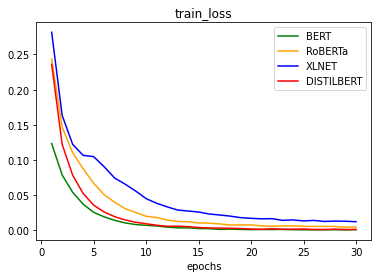

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(model_bert['epochs_count'],model_bert['train_losses'],color='green')
plt.plot(model_roberta['epochs_count'],model_roberta['train_losses'],color='orange')
plt.plot(model_xlnet['epochs_count'],model_xlnet['train_losses'],color='blue')
plt.plot(model_distilBert['epochs_count'],model_distilBert['train_losses'],color='red')

#plt.xlim([1, 5])
plt.legend(['BERT', 'RoBERTa', 'XLNET', 'DISTILBERT'])
plt.title(('train_loss'))
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

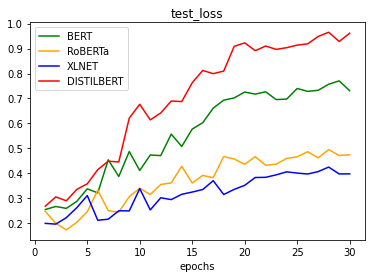

In [ ]:
plt.plot(model_bert['epochs_count'],model_bert['valid_losses'],color='green')
plt.plot(model_roberta['epochs_count'],model_roberta['valid_losses'],color='orange')
plt.plot(model_xlnet['epochs_count'],model_xlnet['valid_losses'],color='blue')
plt.plot(model_distilBert['epochs_count'],model_distilBert['valid_losses'],color='red')

plt.legend(['BERT', 'RoBERTa', 'XLNET', 'DISTILBERT'])
plt.title(('test_loss'))
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

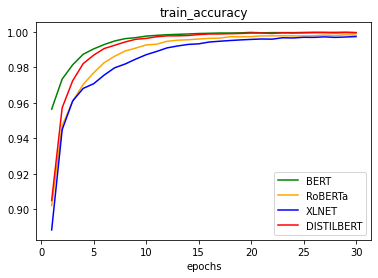

In [ ]:
plt.plot(model_bert['epochs_count'],model_bert['train_accuracy'],color='green')
plt.plot(model_roberta['epochs_count'],model_roberta['train_accuracy'],color='orange')
plt.plot(model_xlnet['epochs_count'],model_xlnet['train_accuracy'],color='blue')
plt.plot(model_distilBert['epochs_count'],model_distilBert['train_accuracy'],color='red')


plt.legend(['BERT', 'RoBERTa', 'XLNET', 'DISTILBERT'])
plt.title(('train_accuracy'))
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

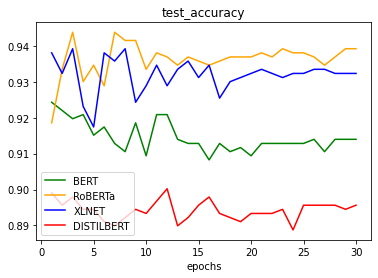

In [ ]:
plt.plot(model_bert['epochs_count'],model_bert['valid_accuracy'],color='green')
plt.plot(model_roberta['epochs_count'],model_roberta['valid_accuracy'],color='orange')
plt.plot(model_xlnet['epochs_count'],model_xlnet['valid_accuracy'],color='blue')
plt.plot(model_distilBert['epochs_count'],model_distilBert['valid_accuracy'],color='red')

plt.legend(['BERT', 'RoBERTa', 'XLNET', 'DISTILBERT'])
plt.title(('test_accuracy'))
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

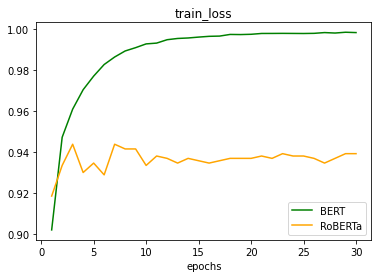

In [ ]:
plt.plot(model_bert['epochs_count'],model_roberta['train_accuracy'],color='green')
plt.plot(model_roberta['epochs_count'],model_roberta['valid_accuracy'],color='orange')

#plt.xlim([1, 5])
plt.legend(['train_accuracy', 'valid_accuracy'])
plt.title(('train_loss'))
plt.xlabel('epochs')